# Proyecto EMG 
### Alonso Flores y Cristofer Hernandez




In [11]:
import numpy as np
import scipy.io
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import pandas as pd  
from numpy.core.umath_tests import inner1d
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import svm, datasets

import itertools
import matplotlib.pyplot as plt

import keras
from keras.optimizers import SGD
from keras import backend as K
K.set_image_dim_ordering('th')
from PIL import Image
from matplotlib.pyplot import imshow
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import History 
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

from datetime import datetime

# 1 Entrega Preliminar

## 1.1 Cargar dataset

In [12]:
d = scipy.io.loadmat("data_fft2.mat")  # transformadas de fourier de datos originales
fft = d.get("data_fft")   # fft

Y=[]   # arreglo con las clases de cada dato
for j in range(4):
    for i in range(30):
        Y.append(1);
    for i in range(30):
        Y.append(2);
    for i in range(30):
        Y.append(3);
    for i in range(30):
        Y.append(4);
    for i in range(30):
        Y.append(5);
    for i in range(30):
        Y.append(6);


## 1.2 Clasificador

In [49]:
def rf(X,y):
    accuracy=np.zeros(5)
    time=np.zeros(5)
    for i in range(5):
        ## asignación de datasets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=37, stratify=y)

        ## Random Forest
        a = datetime.now()
        clf = RandomForestClassifier(n_estimators=25, max_depth=10)
        clf.fit(X_train, y_train)    ## Entrenamos con X_train y clases y_train
        y_pred = clf.predict(X_test)   ## Predecimos con nuevos datos (los de test X_test)
        accuracy[i]=metrics.accuracy_score(y_test, y_pred)
        b = datetime.now()
        c=b-a
        time[i]=c.microseconds/1000
        if (i==0):
            cm1 = confusion_matrix(y_test, y_pred) ## matriz de confusion
            modelo = clf
        else:
            if accuracy[i]>accuracy[i-1]:
                cm1 = confusion_matrix(y_test, y_pred) ## matriz de confusion
                modelo=clf
    return [accuracy,modelo,cm1,time]
            

## 1.3 Entrenamiento de Clasificador

In [50]:
X=fft
y=Y

accuracy,_,cm1,time=rf(X,y)      

prom_acc=np.mean(accuracy)
desv_acc=np.std(accuracy)
prom_time=np.mean(time)
desv_time=np.std(time)

print('Promedio de tiempo en mili segundos:',prom_time)
print('Desviación Estándar de tiempo en mili segundos:',desv_time)

print('Promedio de Accuracy:',prom_acc)
print('Desviación Estándar de Accuracy:',desv_acc)


Promedio de tiempo en mili segundos: 702.6306000000001
Desviación Estándar de tiempo en mili segundos: 9.168916895686209
Promedio de Accuracy: 0.64
Desviación Estándar de Accuracy: 0.021198648920376578


## 1.4 Obtención de Matriz de Confusión

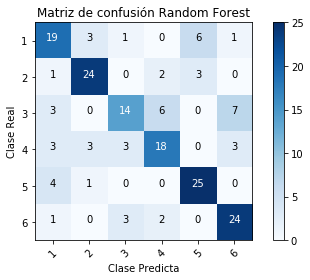

In [43]:
class_names = [1,2,3,4,5,6]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Clase Real')
    plt.xlabel('Clase Predicta')
    plt.tight_layout()


# matriz de confusion para random forest
cnf_matrix = cm1
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusión Random Forest')
plt.show()

# 2 Entrega Final

## 2.1 EMD

### 2.1.1 Cálculo IMFs

In [ ]:
# from PyEMD import EMD
# import numpy as np

# d = scipy.io.loadmat("data_orig2.mat")  #datos originales
# d_ch1 = d.get("data_ch1")   # datos del canal 1
# d_ch2 = d.get("data_ch2")   # datos del canal 2

A continuación se presenta el calculo de las IMFs, para calculas todas las IMFs para cada muestra se deben descomentar todas las instrucciones y comentar las que no estan comentada, estos calculos toman mucho tiempo y no se pudieron correr en nuestros pcs, por ello solo se calculan las IMFs para la primera muestra y se plotea la señal de entrada junto a sus tres primeras IMFs.


In [ ]:

## para ch1
# IMFs_ch1=np.zeros((720,9000))
                  
# for i in range(len(d_ch1)):
#     s=d_ch1[i,:]
#     emd = EMD()
#     IMFs = emd(s,max_imf=3)
#     IMFs_ch1[i][0:3000] = IMFs[0][:]
#     IMFs_ch1[i][3000:6000] = IMFs[1][:]
#     IMFs_ch1[i][6000:9000] = IMFs[2][:]




In [ ]:
# import csv

# myFile = open('IMFs_ch1_2', 'w')
# with myFile:
#     writer = csv.writer(myFile)
#     writer.writerows(IMFs_ch1)

In [ ]:
## para ch2
# IMFs_ch2=np.zeros((720,9000))
                  
# for i in range(len(d_ch2)):
#     s=d_ch2[i,:]
#     emd = EMD()
#     IMFs = emd(s,max_imf=3)
#     IMFs_ch2[i][0:3000] = IMFs[0][:]
#     IMFs_ch2[i][3000:6000] = IMFs[1][:]
#     IMFs_ch2[i][6000:9000] = IMFs[2][:]

In [ ]:
# import csv

# myFile = open('IMFs_ch2_2', 'w')
# with myFile:
#     writer = csv.writer(myFile)
#     writer.writerows(IMFs_ch2)

## 2.2 Extraccion de características

In [45]:
# 1- Integrated Electromvogram 
def promedio(X):
    prom=np.zeros((len(X),1))
    for j in range(0,len(X)):
        sum=0.0
        for i in range(0,len(X[0])):
            sum=sum+abs(X[j][i])
        prom[j]=sum/len(X[0])    
    return prom 

# 2- Zero_cross
def cruces_por_cero(X):
    cruces=np.zeros((len(X),1))
    for j in range(0,len(X)):
        s=0;
        for i in range(0,len(X[0])-1):
            if X[j][i]*X[j][i+1]<0:
                s=s+1;
        cruces[j]=s
    return cruces

# 3- Slope_sign_changes
def slope_sign_changes(X):
    changes=np.zeros((len(X),1))
    for j in range(0,len(X)):
        s=0;
        for i in range(1,len(X[0])-1):
            if X[j][i]<X[j][i+1] and X[j][i]<X[j][i-1] or X[j][i]>X[j][i+1] and X[j][i]>X[j][i-1]:
                s=s+1;
        changes[j]=s
    return changes

# 4- WL
def WL(X):
    wl=np.zeros((len(X),1))
    for j in range(0,len(X)):
        s=0;
        for i in range(0,len(X[0])-1):
            s=s+abs(X[j][i+1]-X[j][i])
        wl[j]=s
    return wl

# 5- WAMP
def WAMP(X):
    wamp=np.zeros((len(X),1))
    for j in range(0,len(X)):
        s=0;
        for i in range(0,len(X[0])-1):
            if abs(X[j][i+1]-X[j][i])>0.1:
                s=s+1
        wamp[j]=s
    return wamp

# 6-Varianza
def varianza(X):
    var=np.zeros((len(X),1))
    for j in range(0,len(X)):
        s=0;
        for i in range(0,len(X[0])):
            s=s+X[j][i]*X[j][i]
        var[j]=s/(len(X[0])-1)
    return var

# 7-Skewness
def skewness(X):
    skew=np.zeros((len(X),1))
    for j in range(0,len(X)):
        skew[j]=scipy.stats.skew(X[j])
    return skew

# 8-Kurtosis scipy.stats.kurtosis
def kurtosis(X):
    kurt=np.zeros((len(X),1))
    for j in range(0,len(X)):
        kurt[j]=scipy.stats.kurtosis(X[j],fisher=False)
    return kurt

# 9-Median
def mediana(X):
    med=np.zeros((len(X),1))
    for j in range(0,len(X)):
        med[j]=np.median(X[j])
    return med

# caracteristicas
def caracteristicas(X):
    y1=pd.DataFrame(promedio(X))
    y2=pd.DataFrame(cruces_por_cero(X))
    y3=pd.DataFrame(slope_sign_changes(X))
    y4=pd.DataFrame(WL(X))
    y5=pd.DataFrame(WAMP(X))
    y6=pd.DataFrame(varianza(X))
    y7=pd.DataFrame(skewness(X))
    y8=pd.DataFrame(kurtosis(X))
    y9=pd.DataFrame(mediana(X))
    carac=pd.concat([y1,y2,y3,y4,y5,y6,y7,y8,y9], axis=1)
    return carac

In [46]:
d = scipy.io.loadmat("data_orig2.mat")  #datos originales
d_ch1 = d.get("data_ch1")   # datos del canal 1
d_ch2 = d.get("data_ch2")   # datos del canal 2

import csv
 
IMFs_ch1 = np.array(pd.read_csv('IMFs_ch1_2.csv',header=None))
IMFs_ch2 = np.array(pd.read_csv('IMFs_ch2_2.csv',header=None))

In [47]:
y1=caracteristicas(d_ch1)
y2=caracteristicas(IMFs_ch1[:,0:3000])
y3=caracteristicas(IMFs_ch1[:,3000:6000])
y4=caracteristicas(IMFs_ch1[:,6000:9000])
y5=caracteristicas(d_ch2)
y6=caracteristicas(IMFs_ch2[:,0:3000])
y7=caracteristicas(IMFs_ch2[:,3000:6000])
y8=caracteristicas(IMFs_ch2[:,6000:9000])
carac=pd.concat([y1,y2,y3,y4,y5,y6,y7,y8], axis=1)
carac=np.array(carac)


## 2.3 Clasificación

In [52]:
## asignación de datasets
X=scale(carac, axis=0, with_mean=True, with_std=True)
y=Y

accuracy,clf,cm2,time=rf(X,y)
            
prom_acc=np.mean(accuracy)
desv_acc=np.std(accuracy)

prom_time=np.mean(time)
desv_time=np.std(time)

print('Promedio de tiempo en mili segundos:',prom_time)
print('Desviación Estándar de tiempo en mili segundos:',desv_time)

print('Promedio de Accuracy:',prom_acc)
print('Desviación Estándar de Accuracy:',desv_acc)

print('\nCaracteristicas ordenadas por importancia (RF)')
feature_importances = clf.feature_importances_
importance_order = np.argsort(-feature_importances)
feature_names = ['Promedio1', 'Cruces por cero1', 'Cambios de signo de pendiente1', 'Wl1', 'Wamp1',
                 'Varianza1', 'Skewness1', 'Kurtosis1', 'Mediana1',
                 'Promedio2', 'Cruces por cero2', 'Cambios de signo de pendiente2', 'Wl2', 'Wamp2',
                 'Varianza2', 'Skewness2', 'Kurtosis2', 'Mediana2',
                 'Promedio3', 'Cruces por cero3', 'Cambios de signo de pendiente3', 'Wl3', 'Wamp3',
                 'Varianza3', 'Skewness3', 'Kurtosis3', 'Mediana3',
                 'Promedio4', 'Cruces por cero4', 'Cambios de signo de pendiente4', 'Wl4', 'Wamp4',
                 'Varianza4', 'Skewness4', 'Kurtosis4', 'Mediana4',
                 'Promedio5', 'Cruces por cero5', 'Cambios de signo de pendiente5', 'Wl5', 'Wamp5',
                 'Varianza5', 'Skewness5', 'Kurtosis5', 'Mediana5',
                 'Promedio6', 'Cruces por cero6', 'Cambios de signo de pendiente6', 'Wl6', 'Wamp6',
                 'Varianza6', 'Skewness6', 'Kurtosis6', 'Mediana6',
                 'Promedio7', 'Cruces por cero7', 'Cambios de signo de pendiente7', 'Wl7', 'Wamp7',
                 'Varianza7', 'Skewness7', 'Kurtosis7', 'Mediana7',
                 'Promedio8', 'Cruces por cero8', 'Cambios de signo de pendiente8', 'Wl8', 'Wamp8',
                 'Varianza8', 'Skewness8', 'Kurtosis8', 'Mediana8'
                ] 
for index in importance_order:
    print('\t%.3f %s' % (feature_importances[index], feature_names[index]))


Promedio de tiempo en mili segundos: 143.813
Desviación Estándar de tiempo en mili segundos: 5.793023528348561
Promedio de Accuracy: 0.9633333333333333
Desviación Estándar de Accuracy: 0.005665577237325296

Caracteristicas ordenadas por importancia (RF)
	0.039 Varianza8
	0.032 Varianza7
	0.030 Wl8
	0.028 Cruces por cero7
	0.028 Promedio1
	0.027 Wamp7
	0.025 Varianza3
	0.025 Cambios de signo de pendiente1
	0.025 Cruces por cero5
	0.025 Cambios de signo de pendiente7
	0.025 Varianza1
	0.024 Promedio8
	0.022 Promedio7
	0.021 Wl5
	0.021 Varianza5
	0.021 Cambios de signo de pendiente5
	0.020 Wamp2
	0.019 Wl6
	0.018 Mediana2
	0.018 Varianza2
	0.017 Cambios de signo de pendiente8
	0.017 Wamp8
	0.017 Cruces por cero6
	0.016 Kurtosis1
	0.016 Cruces por cero2
	0.016 Kurtosis6
	0.016 Wamp1
	0.015 Promedio6
	0.015 Cambios de signo de pendiente2
	0.014 Promedio2
	0.014 Cambios de signo de pendiente3
	0.014 Wamp6
	0.014 Kurtosis5
	0.014 Varianza6
	0.014 Skewness1
	0.014 Wamp5
	0.014 Cruces por cero1

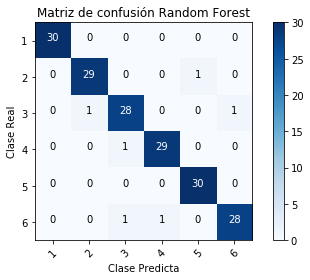

In [54]:
# import some data to play with

class_names = [1,2,3,4,5,6]

# matriz de confusion para random forest
cnf_matrix = cm2
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusión Random Forest')

plt.show()

## 2.4 Reducción de dimensionalidad

In [55]:
def caracteristicas(X):
    y1=pd.DataFrame(promedio(X))
    y2=pd.DataFrame(cruces_por_cero(X))
    y3=pd.DataFrame(slope_sign_changes(X))
    y4=pd.DataFrame(WL(X))
    y5=pd.DataFrame(WAMP(X))
    y6=pd.DataFrame(varianza(X))
    #y7=pd.DataFrame(skewness(X))
    #y8=pd.DataFrame(kurtosis(X))
    #y9=pd.DataFrame(mediana(X))
    carac=pd.concat([y1,y2,y3,y4,y5,y6], axis=1)
    return carac

In [56]:
y1=caracteristicas(d_ch1)
y2=caracteristicas(IMFs_ch1[:,0:3000])
y3=caracteristicas(IMFs_ch1[:,3000:6000])
y4=caracteristicas(IMFs_ch1[:,6000:9000])
y5=caracteristicas(d_ch2)
y6=caracteristicas(IMFs_ch2[:,0:3000])
y7=caracteristicas(IMFs_ch2[:,3000:6000])
y8=caracteristicas(IMFs_ch2[:,6000:9000])
carac2=pd.concat([y1,y2,y3,y4,y5,y6,y7,y8], axis=1)
carac2=np.array(carac2)


In [57]:
X=scale(carac2, axis=0, with_mean=True, with_std=True)
accuracy,random_forest,cm2,time=rf(X,y)
            
prom_acc=np.mean(accuracy)
desv_acc=np.std(accuracy)

prom_time=np.mean(time)
desv_time=np.std(time)

print('Promedio de tiempo en mili segundos:',prom_time)
print('Desviación Estándar de tiempo en mili segundos:',desv_time)

print('Promedio de Accuracy:',prom_acc)
print('Desviación Estándar de Accuracy:',desv_acc)

Promedio de tiempo en mili segundos: 122.7182
Desviación Estándar de tiempo en mili segundos: 13.09454358731147
Promedio de Accuracy: 0.9466666666666667
Desviación Estándar de Accuracy: 0.005665577237325331


## 2.5 Análisis por ventanas

In [64]:
def ventanas(X,n):
    num=int(3000/n)
    vent=caracteristicas(X[:,0:num])
    for i in range(1,n):
        x1=num*i
        x2=x1+num
        v=caracteristicas(X[:,x1:x2])
        vent=pd.concat([vent,v], axis=1)
    return vent
        

In [65]:
y=Y

indices=np.array([1,2,3,4,5,6,8,10])
accuracy=np.zeros((len(indices),5))
time=np.zeros((len(indices),5))
for i in range(len(indices)):
    y1=ventanas(d_ch1,indices[i])
    y2=ventanas(IMFs_ch1[:,0:3000],indices[i])
    y3=ventanas(IMFs_ch1[:,3000:6000],indices[i])
    y4=ventanas(IMFs_ch1[:,6000:9000],indices[i])
    y5=ventanas(d_ch2,indices[i])
    y6=ventanas(IMFs_ch2[:,0:3000],indices[i])
    y7=ventanas(IMFs_ch2[:,3000:6000],indices[i])
    y8=ventanas(IMFs_ch2[:,6000:9000],indices[i])
    vents=pd.concat([y1,y2,y3,y4,y5,y6,y7,y8], axis=1)
    vents=np.array(vents)
    accuracy[i,:],_,_,time[i,:]=rf(vents,y)   

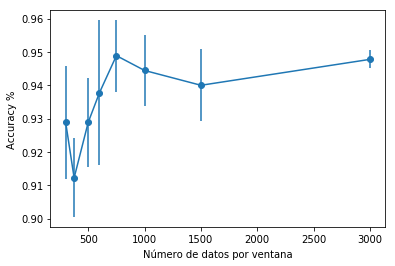

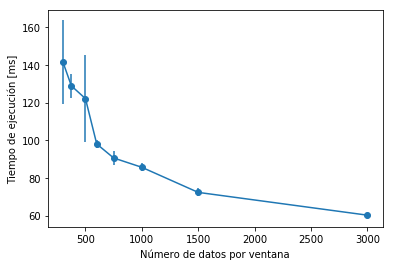

In [66]:
import matplotlib
import matplotlib.pyplot as plt

prom_acc=np.zeros(len(accuracy))
desv_acc=np.zeros(len(accuracy))
for i in range(len(accuracy)):
    prom_acc[i]=np.mean(accuracy[i])
    desv_acc[i]=np.std(accuracy[i])

prom_time=np.zeros(len(time))
desv_time=np.zeros(len(time))
for i in range(len(time)):
    prom_time[i]=np.mean(time[i])
    desv_time[i]=np.std(time[i])
    
indices=np.array([3000,1500,1000,750,600,500,375,300])
plt.errorbar(indices, prom_acc, yerr=desv_acc,fmt='o-')
plt.xlabel("Número de datos por ventana")
plt.ylabel("Accuracy %")
plt.show()

plt.errorbar(indices, prom_time, yerr=desv_time,fmt='o-')
plt.xlabel("Número de datos por ventana")
plt.ylabel("Tiempo de ejecución [ms]")
plt.show()

## 2.6 Red convolucional

In [59]:
d = scipy.io.loadmat("data_fft2.mat")  # transformadas de fourier de datos originales
fft = d.get("data_fft")   # fft

Y_conv=np.zeros((720,6))   # arreglo con las clases de cada dato
clase0=np.array([1,0,0,0,0,0])
clase1=np.array([0,1,0,0,0,0])
clase2=np.array([0,0,1,0,0,0])
clase3=np.array([0,0,0,1,0,0])
clase4=np.array([0,0,0,0,1,0])
clase5=np.array([0,0,0,0,0,1])

for j in range(4):
    for i in range(30):
        Y_conv[i+j*180][:]=clase0
        Y_conv[i+j*180+30][:]=clase1
        Y_conv[i+j*180+60][:]=clase2
        Y_conv[i+j*180+90][:]=clase3
        Y_conv[i+j*180+120][:]=clase4
        Y_conv[i+j*180+150][:]=clase5
        
import numpy as np
C1=fft[0:720,1:1500]
C2=fft[0:720,1501:3000]
C3 = np.zeros(shape=(720,1499,2))
C3.shape
for i in range(0,720):
    for j in range (0,1499):
        C3[i,j,0]= C1[i,j]
  
for i in range(0,720):
    for j in range (0,1499):
        C3[i,j,1]= C2[i,j] 

C4=np.reshape(C3, (720,1499,2,1))

Train on 540 samples, validate on 180 samples
Epoch 1/150
540/540 [==============================] - 1s 2ms/step - loss: 1.7969 - acc: 0.1574 - val_loss: 1.7810 - val_acc: 0.1778

Epoch 00001: val_acc improved from -inf to 0.17778, saving model to weights.best.hdf5
Epoch 2/150
540/540 [==============================] - 0s 734us/step - loss: 1.7726 - acc: 0.2093 - val_loss: 1.7200 - val_acc: 0.3944

Epoch 00002: val_acc improved from 0.17778 to 0.39444, saving model to weights.best.hdf5
Epoch 3/150
540/540 [==============================] - 0s 633us/step - loss: 1.6574 - acc: 0.2889 - val_loss: 1.5161 - val_acc: 0.3889

Epoch 00003: val_acc did not improve from 0.39444
Epoch 4/150
540/540 [==============================] - 0s 622us/step - loss: 1.4740 - acc: 0.3944 - val_loss: 1.4054 - val_acc: 0.4389

Epoch 00004: val_acc improved from 0.39444 to 0.43889, saving model to weights.best.hdf5
Epoch 5/150
540/540 [==============================] - 0s 739us/step - loss: 1.4116 - acc: 0.4037 

540/540 [==============================] - 0s 541us/step - loss: 0.6285 - acc: 0.7537 - val_loss: 1.3744 - val_acc: 0.5778

Epoch 00042: val_acc did not improve from 0.72222
Epoch 43/150
540/540 [==============================] - 0s 573us/step - loss: 0.6436 - acc: 0.7019 - val_loss: 0.6667 - val_acc: 0.7167

Epoch 00043: val_acc did not improve from 0.72222
Epoch 44/150
540/540 [==============================] - 0s 535us/step - loss: 0.5264 - acc: 0.7778 - val_loss: 0.8533 - val_acc: 0.5944

Epoch 00044: val_acc did not improve from 0.72222
Epoch 45/150
540/540 [==============================] - 0s 528us/step - loss: 0.6100 - acc: 0.7259 - val_loss: 0.9035 - val_acc: 0.6778

Epoch 00045: val_acc did not improve from 0.72222
Epoch 46/150
540/540 [==============================] - 0s 513us/step - loss: 0.5883 - acc: 0.7426 - val_loss: 0.9101 - val_acc: 0.6333

Epoch 00046: val_acc did not improve from 0.72222
Epoch 47/150
540/540 [==============================] - 0s 497us/step - loss: 

540/540 [==============================] - 0s 504us/step - loss: 0.2249 - acc: 0.9037 - val_loss: 0.9044 - val_acc: 0.7278

Epoch 00084: val_acc did not improve from 0.81667
Epoch 85/150
540/540 [==============================] - 0s 544us/step - loss: 0.2476 - acc: 0.8963 - val_loss: 0.6798 - val_acc: 0.7667

Epoch 00085: val_acc did not improve from 0.81667
Epoch 86/150
540/540 [==============================] - 0s 564us/step - loss: 0.2677 - acc: 0.8944 - val_loss: 0.6428 - val_acc: 0.8000

Epoch 00086: val_acc did not improve from 0.81667
Epoch 87/150
540/540 [==============================] - 0s 601us/step - loss: 0.1880 - acc: 0.9259 - val_loss: 0.7100 - val_acc: 0.7556

Epoch 00087: val_acc did not improve from 0.81667
Epoch 88/150
540/540 [==============================] - 0s 600us/step - loss: 0.4011 - acc: 0.8667 - val_loss: 1.9688 - val_acc: 0.5611

Epoch 00088: val_acc did not improve from 0.81667
Epoch 89/150
540/540 [==============================] - 0s 633us/step - loss: 


Epoch 00127: val_acc did not improve from 0.81667
Epoch 128/150
540/540 [==============================] - 0s 499us/step - loss: 0.2265 - acc: 0.9185 - val_loss: 0.5585 - val_acc: 0.7778

Epoch 00128: val_acc did not improve from 0.81667
Epoch 129/150
540/540 [==============================] - 0s 502us/step - loss: 0.2993 - acc: 0.9000 - val_loss: 0.5788 - val_acc: 0.7944

Epoch 00129: val_acc did not improve from 0.81667
Epoch 130/150
540/540 [==============================] - 0s 493us/step - loss: 0.1586 - acc: 0.9611 - val_loss: 0.6129 - val_acc: 0.7722

Epoch 00130: val_acc did not improve from 0.81667
Epoch 131/150
540/540 [==============================] - 0s 511us/step - loss: 0.1525 - acc: 0.9574 - val_loss: 0.6410 - val_acc: 0.7889

Epoch 00131: val_acc did not improve from 0.81667
Epoch 132/150
540/540 [==============================] - 0s 583us/step - loss: 0.1355 - acc: 0.9611 - val_loss: 0.6940 - val_acc: 0.7833

Epoch 00132: val_acc did not improve from 0.81667
Epoch 133

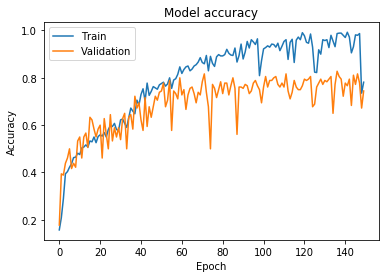

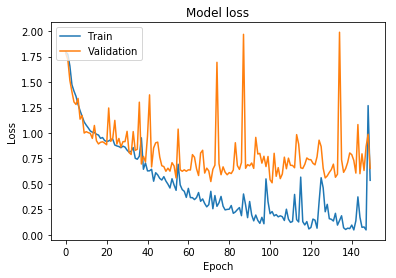

In [61]:
y=Y_conv
x_train, x_test, y_train, y_test = train_test_split(C4, y, test_size = 0.25)

model = Sequential()
model.add(Conv2D(32, kernel_size=(1, 1), strides=(1, 1),
                 activation='relu',
                 input_shape=(1499,2,1)))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Conv2D(64, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.1),
              metrics=['accuracy'])

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
a = datetime.now()
history= model.fit(x_train, y_train,
          batch_size=6,
          epochs=150,
          verbose=1, 
          validation_data=(x_test,y_test),
          callbacks=[checkpoint])
b = datetime.now()
c = b-a
print('Tiempo en mili segundos:',c.microseconds/1000)
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 2.7 Dropout

Train on 540 samples, validate on 180 samples
Epoch 1/150
540/540 [==============================] - 1s 2ms/step - loss: 1.7958 - acc: 0.1611 - val_loss: 1.7920 - val_acc: 0.1778

Epoch 00001: val_acc improved from -inf to 0.17778, saving model to weights.best.hdf5
Epoch 2/150
540/540 [==============================] - 0s 757us/step - loss: 1.7777 - acc: 0.2019 - val_loss: 1.7348 - val_acc: 0.2333

Epoch 00002: val_acc improved from 0.17778 to 0.23333, saving model to weights.best.hdf5
Epoch 3/150
540/540 [==============================] - 0s 696us/step - loss: 1.6628 - acc: 0.2778 - val_loss: 1.4955 - val_acc: 0.3444

Epoch 00003: val_acc improved from 0.23333 to 0.34444, saving model to weights.best.hdf5
Epoch 4/150
540/540 [==============================] - 0s 764us/step - loss: 1.5137 - acc: 0.3870 - val_loss: 1.3463 - val_acc: 0.4500

Epoch 00004: val_acc improved from 0.34444 to 0.45000, saving model to weights.best.hdf5
Epoch 5/150
540/540 [==============================] - 0s 7

Epoch 00041: val_acc improved from 0.66667 to 0.67222, saving model to weights.best.hdf5
Epoch 42/150
540/540 [==============================] - 0s 549us/step - loss: 0.7201 - acc: 0.6944 - val_loss: 0.7999 - val_acc: 0.6944

Epoch 00042: val_acc improved from 0.67222 to 0.69444, saving model to weights.best.hdf5
Epoch 43/150
540/540 [==============================] - 0s 555us/step - loss: 0.6462 - acc: 0.7111 - val_loss: 0.8449 - val_acc: 0.6556

Epoch 00043: val_acc did not improve from 0.69444
Epoch 44/150
540/540 [==============================] - 0s 569us/step - loss: 0.6563 - acc: 0.7185 - val_loss: 0.6604 - val_acc: 0.7444

Epoch 00044: val_acc improved from 0.69444 to 0.74444, saving model to weights.best.hdf5
Epoch 45/150
540/540 [==============================] - 0s 634us/step - loss: 0.6483 - acc: 0.7093 - val_loss: 0.6062 - val_acc: 0.7556

Epoch 00045: val_acc improved from 0.74444 to 0.75556, saving model to weights.best.hdf5
Epoch 46/150
540/540 [========================

540/540 [==============================] - 0s 581us/step - loss: 0.3450 - acc: 0.8426 - val_loss: 0.4923 - val_acc: 0.7778

Epoch 00084: val_acc did not improve from 0.83333
Epoch 85/150
540/540 [==============================] - 0s 582us/step - loss: 0.3911 - acc: 0.8333 - val_loss: 0.4447 - val_acc: 0.8444

Epoch 00085: val_acc improved from 0.83333 to 0.84444, saving model to weights.best.hdf5
Epoch 86/150
540/540 [==============================] - 0s 620us/step - loss: 0.3499 - acc: 0.8463 - val_loss: 0.6680 - val_acc: 0.7611

Epoch 00086: val_acc did not improve from 0.84444
Epoch 87/150
540/540 [==============================] - 0s 613us/step - loss: 0.3198 - acc: 0.8426 - val_loss: 0.4603 - val_acc: 0.8222

Epoch 00087: val_acc did not improve from 0.84444
Epoch 88/150
540/540 [==============================] - 0s 585us/step - loss: 0.3829 - acc: 0.8259 - val_loss: 0.4686 - val_acc: 0.7944

Epoch 00088: val_acc did not improve from 0.84444
Epoch 89/150
540/540 [=================

540/540 [==============================] - 0s 547us/step - loss: 0.2258 - acc: 0.9148 - val_loss: 0.3554 - val_acc: 0.9056

Epoch 00127: val_acc improved from 0.85556 to 0.90556, saving model to weights.best.hdf5
Epoch 128/150
540/540 [==============================] - 0s 549us/step - loss: 0.2498 - acc: 0.8722 - val_loss: 0.4137 - val_acc: 0.8556

Epoch 00128: val_acc did not improve from 0.90556
Epoch 129/150
540/540 [==============================] - 0s 565us/step - loss: 0.2961 - acc: 0.8722 - val_loss: 0.4758 - val_acc: 0.8056

Epoch 00129: val_acc did not improve from 0.90556
Epoch 130/150
540/540 [==============================] - 0s 619us/step - loss: 0.2443 - acc: 0.8852 - val_loss: 1.1436 - val_acc: 0.6778

Epoch 00130: val_acc did not improve from 0.90556
Epoch 131/150
540/540 [==============================] - 0s 594us/step - loss: 0.4257 - acc: 0.8333 - val_loss: 0.5016 - val_acc: 0.8389

Epoch 00131: val_acc did not improve from 0.90556
Epoch 132/150
540/540 [============

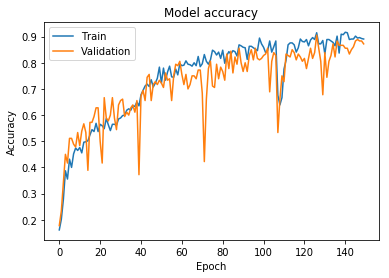

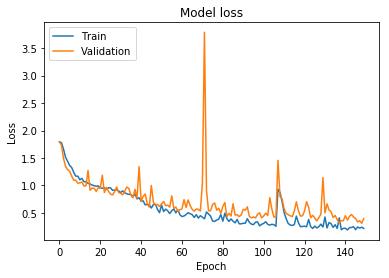

In [62]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(1, 1), strides=(1, 1),
                 activation='relu',
                 input_shape=(1499,2,1)))
model2.add(MaxPooling2D(pool_size=(1, 1)))
model2.add(Conv2D(64, (1, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(1, 1)))
model2.add(Dropout(0.1))
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(6, activation='softmax'))
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.1),
              metrics=['accuracy'])

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
a = datetime.now()
history2=model2.fit(x_train, y_train,
          batch_size=6,
          epochs=150,
          verbose=1, 
          validation_data=(x_test,y_test),
          callbacks=[checkpoint])
b = datetime.now()
c = b-a
print('Tiempo en mili segundos:',c.microseconds/1000)
# Plot training & validation accuracy values
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 2.8 Batch Normalization

Train on 540 samples, validate on 180 samples
Epoch 1/150
540/540 [==============================] - 1s 3ms/step - loss: 1.8316 - acc: 0.2037 - val_loss: 1.6762 - val_acc: 0.2222

Epoch 00001: val_acc improved from -inf to 0.22222, saving model to weights.best.hdf5
Epoch 2/150
540/540 [==============================] - 1s 1ms/step - loss: 1.6142 - acc: 0.3315 - val_loss: 1.4323 - val_acc: 0.4778

Epoch 00002: val_acc improved from 0.22222 to 0.47778, saving model to weights.best.hdf5
Epoch 3/150
540/540 [==============================] - 1s 944us/step - loss: 1.4734 - acc: 0.3741 - val_loss: 1.3652 - val_acc: 0.4556

Epoch 00003: val_acc did not improve from 0.47778
Epoch 4/150
540/540 [==============================] - 0s 922us/step - loss: 1.4257 - acc: 0.3759 - val_loss: 1.2385 - val_acc: 0.4944

Epoch 00004: val_acc improved from 0.47778 to 0.49444, saving model to weights.best.hdf5
Epoch 5/150
540/540 [==============================] - 0s 867us/step - loss: 1.3272 - acc: 0.4074 - 

540/540 [==============================] - 0s 748us/step - loss: 0.4221 - acc: 0.7926 - val_loss: 0.5963 - val_acc: 0.7444

Epoch 00042: val_acc did not improve from 0.79444
Epoch 43/150
540/540 [==============================] - 0s 716us/step - loss: 0.5044 - acc: 0.7648 - val_loss: 0.5511 - val_acc: 0.7167

Epoch 00043: val_acc did not improve from 0.79444
Epoch 44/150
540/540 [==============================] - 0s 742us/step - loss: 0.5142 - acc: 0.7556 - val_loss: 0.4563 - val_acc: 0.8111

Epoch 00044: val_acc improved from 0.79444 to 0.81111, saving model to weights.best.hdf5
Epoch 45/150
540/540 [==============================] - 0s 717us/step - loss: 0.4581 - acc: 0.7870 - val_loss: 0.5257 - val_acc: 0.7556

Epoch 00045: val_acc did not improve from 0.81111
Epoch 46/150
540/540 [==============================] - 0s 722us/step - loss: 0.4260 - acc: 0.8074 - val_loss: 0.6417 - val_acc: 0.7000

Epoch 00046: val_acc did not improve from 0.81111
Epoch 47/150
540/540 [=================

540/540 [==============================] - 0s 870us/step - loss: 0.2758 - acc: 0.8889 - val_loss: 0.3096 - val_acc: 0.8889

Epoch 00084: val_acc did not improve from 0.91111
Epoch 85/150
540/540 [==============================] - ETA: 0s - loss: 0.2247 - acc: 0.912 - 1s 973us/step - loss: 0.2274 - acc: 0.9111 - val_loss: 0.4461 - val_acc: 0.7944

Epoch 00085: val_acc did not improve from 0.91111
Epoch 86/150
540/540 [==============================] - 0s 782us/step - loss: 0.2227 - acc: 0.9074 - val_loss: 0.2253 - val_acc: 0.9389

Epoch 00086: val_acc improved from 0.91111 to 0.93889, saving model to weights.best.hdf5
Epoch 87/150
540/540 [==============================] - 0s 715us/step - loss: 0.3577 - acc: 0.8611 - val_loss: 0.3144 - val_acc: 0.8556

Epoch 00087: val_acc did not improve from 0.93889
Epoch 88/150
540/540 [==============================] - 0s 730us/step - loss: 0.2685 - acc: 0.9019 - val_loss: 0.5998 - val_acc: 0.7667

Epoch 00088: val_acc did not improve from 0.93889
E

540/540 [==============================] - 0s 746us/step - loss: 0.3735 - acc: 0.8537 - val_loss: 0.2533 - val_acc: 0.9111

Epoch 00127: val_acc did not improve from 0.96111
Epoch 128/150
540/540 [==============================] - 0s 671us/step - loss: 0.2233 - acc: 0.9185 - val_loss: 0.6849 - val_acc: 0.7167

Epoch 00128: val_acc did not improve from 0.96111
Epoch 129/150
540/540 [==============================] - 0s 669us/step - loss: 0.2543 - acc: 0.8963 - val_loss: 0.4462 - val_acc: 0.8222

Epoch 00129: val_acc did not improve from 0.96111
Epoch 130/150
540/540 [==============================] - 0s 663us/step - loss: 0.2041 - acc: 0.9259 - val_loss: 0.2431 - val_acc: 0.9222

Epoch 00130: val_acc did not improve from 0.96111
Epoch 131/150
540/540 [==============================] - 0s 726us/step - loss: 0.1855 - acc: 0.9222 - val_loss: 0.2962 - val_acc: 0.8500

Epoch 00131: val_acc did not improve from 0.96111
Epoch 132/150
540/540 [==============================] - 0s 719us/step - l

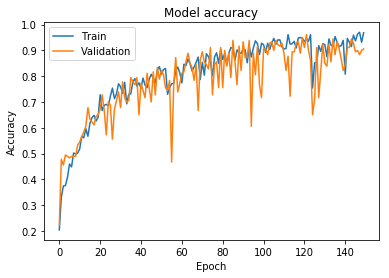

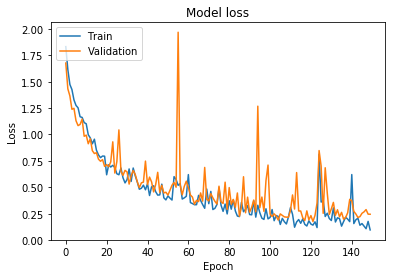

In [63]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(1, 1), strides=(1, 1),
                 input_shape=(1499,2,1)))
model3.add(BatchNormalization(axis=-1))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(1, 1)))
model3.add(Conv2D(64, (1, 1)))
model3.add(BatchNormalization(axis=-1))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(1, 1)))
model3.add(Dropout(0.1))
model3.add(Flatten())
model3.add(Dense(100))
# model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dense(6))
model3.add(Activation('softmax'))
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
a= datetime.now()
history3 = model3.fit(x_train, y_train,
          batch_size=6,
          epochs=150,
          verbose=1, 
          validation_data=(x_test,y_test),
          callbacks=[checkpoint])
b = datetime.now()
c = b-a
print('Tiempo en mili segundos:',c.microseconds/1000)

# Plot training & validation accuracy values
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 2.9 Testeo con una persona

### 2.9.1 Random Forest

In [ ]:
# from PyEMD import EMD
# import numpy as np

# d = scipy.io.loadmat("data_test_2.mat")  #datos originales
# d_ch1 = d.get("data_ch1")   # datos del canal 1
# d_ch2 = d.get("data_ch2")   # datos del canal 

# # para ch1
# IMFs_ch1=np.zeros((180,9000))
                  
# for i in range(len(d_ch1)):
#     s=d_ch1[i,:]
#     emd = EMD()
#     IMFs = emd(s,max_imf=3)
#     IMFs_ch1[i][0:3000] = IMFs[0][:]
#     IMFs_ch1[i][3000:6000] = IMFs[1][:]
#     IMFs_ch1[i][6000:9000] = IMFs[2][:]

# import csv

# myFile = open('IMFs_test_ch1_2', 'w')
# with myFile:
#     writer = csv.writer(myFile)
#     writer.writerows(IMFs_ch1)

# # para ch2
# IMFs_ch2=np.zeros((180,9000))
                  
# for i in range(len(d_ch2)):
#     s=d_ch2[i,:]
#     emd = EMD()
#     IMFs = emd(s,max_imf=3)
#     IMFs_ch2[i][0:3000] = IMFs[0][:]
#     IMFs_ch2[i][3000:6000] = IMFs[1][:]
#     IMFs_ch2[i][6000:9000] = IMFs[2][:]

# import csv

# myFile = open('IMFs_test_ch2_2', 'w')
# with myFile:
#     writer = csv.writer(myFile)
#     writer.writerows(IMFs_ch2)

In [67]:
d_test = scipy.io.loadmat("data_test_2.mat")  #datos originales
d_test_ch1 = d_test.get("data_ch1")   # datos del canal 1
d_test_ch2 = d_test.get("data_ch2")   # datos del canal 2

import csv
 
IMFs_test_ch1 = np.array(pd.read_csv('IMFs_test_ch1_2.csv',header=None))
IMFs_test_ch2 = np.array(pd.read_csv('IMFs_test_ch2_2.csv',header=None))

In [68]:
y1=caracteristicas(d_test_ch1)
y2=caracteristicas(IMFs_test_ch1[:,0:3000])
y3=caracteristicas(IMFs_test_ch1[:,3000:6000])
y4=caracteristicas(IMFs_test_ch1[:,6000:9000])
y5=caracteristicas(d_test_ch2)
y6=caracteristicas(IMFs_test_ch2[:,0:3000])
y7=caracteristicas(IMFs_test_ch2[:,3000:6000])
y8=caracteristicas(IMFs_test_ch2[:,6000:9000])
carac3=pd.concat([y1,y2,y3,y4,y5,y6,y7,y8], axis=1)
carac3=np.array(carac3)

In [69]:
X=scale(carac2, axis=0, with_mean=True, with_std=True)
y=Y

X_test=scale(carac3, axis=0, with_mean=True, with_std=True)
y_test=Y[0:180]


In [71]:
accuracy=np.zeros(5)
time=np.zeros(5)
for i in range(5):
    _,clf,_,_=rf(X,y)
    a = datetime.now()
    y_pred = clf.predict(X_test)   ## Predecimos con nuevos datos (los de test X_test)
    accuracy[i]=metrics.accuracy_score(y_test, y_pred)
    b = datetime.now()
    c = b-a
    time[i]=c.microseconds/100
    
prom_acc=np.mean(accuracy)
desv_acc=np.std(accuracy)

prom_time=np.mean(time)
desv_time=np.std(time)

print('Promedio de tiempo en mili segundos:',prom_time)
print('Desviación Estándar de tiempo en mili segundos:',desv_time)

print('Promedio de Accuracy:',prom_acc)
print('Desviación Estándar de Accuracy:',desv_acc)

Promedio de tiempo en mili segundos: 23.998
Desviación Estándar de tiempo en mili segundos: 4.836661658623643
Promedio de Accuracy: 0.25
Desviación Estándar de Accuracy: 0.051997150919100406


### 2.9.2 CNN

In [72]:
fft_test = scipy.io.loadmat("fft_test_2.mat")  #datos originales
fft = fft_test.get("data_fft")   # datos del canal 1

Y_test=np.zeros((180,6))   # arreglo con las clases de cada dato
clase0=np.array([1,0,0,0,0,0])
clase1=np.array([0,1,0,0,0,0])
clase2=np.array([0,0,1,0,0,0])
clase3=np.array([0,0,0,1,0,0])
clase4=np.array([0,0,0,0,1,0])
clase5=np.array([0,0,0,0,0,1])

for i in range(30):
    Y_test[i][:]=clase0
    Y_test[i+30][:]=clase1
    Y_test[i+60][:]=clase2
    Y_test[i+90][:]=clase3
    Y_test[i+120][:]=clase4
    Y_test[i+150][:]=clase5
        
import numpy as np
D1=fft[0:180,1:1500]
D2=fft[0:180,1501:3000]
D3 = np.zeros(shape=(180,1499,2))
D3.shape
for i in range(0,180):
    for j in range (0,1499):
        D3[i,j,0]= D1[i,j]
  
for i in range(0,180):
    for j in range (0,1499):
        D3[i,j,1]= D2[i,j] 

D4=np.reshape(D3, (180,1499,2,1))
        

In [74]:
X_test=D4
y=Y_conv
x_train, x_test, y_train, y_test = train_test_split(C4, y, test_size = 0.25)

time=np.zeros(5)
accuracy=np.zeros(5)
for i in range(5):
    model4 = Sequential()
    model4.add(Conv2D(32, kernel_size=(1, 1), strides=(1, 1),
                     input_shape=(1499,2,1)))
    model4.add(BatchNormalization(axis=-1))
    model4.add(Activation('relu'))
    model4.add(MaxPooling2D(pool_size=(1, 1)))
    model4.add(Conv2D(64, (1, 1)))
    model4.add(BatchNormalization(axis=-1))
    model4.add(Activation('relu'))
    model4.add(MaxPooling2D(pool_size=(1, 1)))
    model4.add(Dropout(0.1))
    model4.add(Flatten())
    model4.add(Dense(100))
    model4.add(Activation('relu'))
    model4.add(Dense(6))
    model4.add(Activation('softmax'))
    model4.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.SGD(lr=0.01),
                  metrics=['accuracy'])

    model4.fit(x_train, y_train,
              batch_size=6,
              epochs=150,
              verbose=0, 
              validation_data=(x_test,y_test))
    a = datetime.now()
    scores = model4.evaluate(X_test, Y_test, verbose=0)
    accuracy[i]=scores[1]*100
    b = datetime.now()
    c = b-a
    time[i]=c.microseconds/1000
    
prom_acc=np.mean(accuracy)
desv_acc=np.std(accuracy)

prom_time=np.mean(time)
desv_time=np.std(time)

print('Promedio de tiempo en mili segundos:',prom_time)
print('Desviación Estándar de tiempo en mili segundos:',desv_time)

print('Promedio de Accuracy:',prom_acc)
print('Desviación Estándar de Accuracy:',desv_acc)

Promedio de tiempo en mili segundos: 29.520999999999997
Desviación Estándar de tiempo en mili segundos: 1.6204995526071584
Promedio de Accuracy: 29.555555595291985
Desviación Estándar de Accuracy: 4.861031702089368
